<a href="https://colab.research.google.com/github/KN1507/Data_Mining/blob/master/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
##2(A) - Preparing the data and Analysis
##Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
##Loading the Datasets
data = pd.read_csv(r'train.csv')
data_test = pd.read_csv(r'test.csv')


In [4]:
##Viewing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.shape

(891, 12)

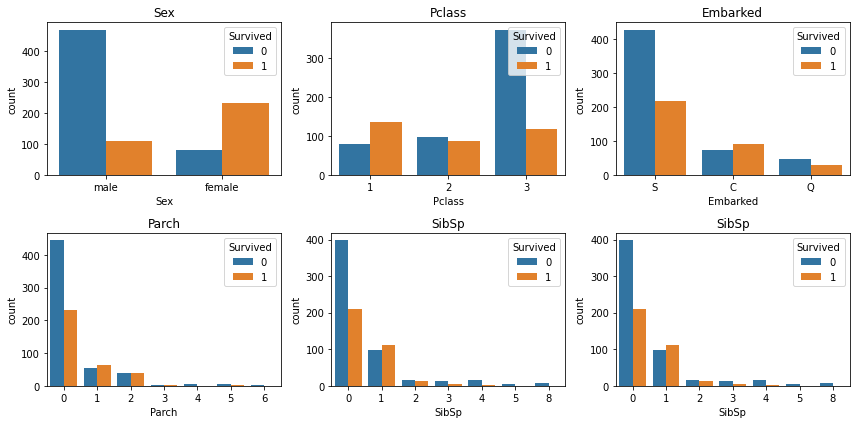

In [15]:
##Graphically Exploring the data
import matplotlib.pyplot as plt
cols = ['Sex','Pclass','Embarked','Parch','SibSp','SibSp']
n_rows=2
n_cols=3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12,6))
#for r in range(0,n_rows):
for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ##print(c)
        ##print(r)
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(data[cols[i]], hue=data["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout
#plt.savefig(r'C:/users/Kailainathan/Desktop/graph.jpg')

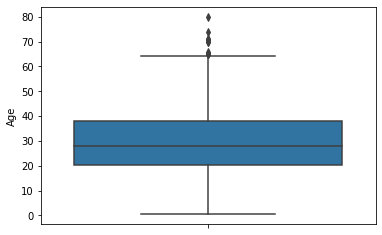

In [17]:
##Boxplot for Age
sns.boxplot(y=data["Age"])

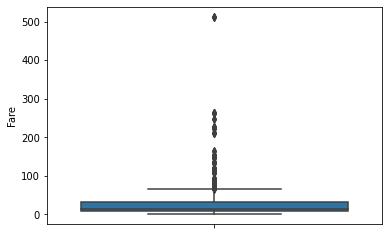

In [18]:
##Boxplot for Fare
sns.boxplot(y=data["Fare"])

In [23]:
##Finding Correlations between survived and (sex,pclass,parch and sibsp)
data_pclass = data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
print(data_pclass)
data_sex = data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
print(data_sex)
data_parch =data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
print(data_parch)
data_sibsp =data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
print(data_sibsp)


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [0]:
##Filling the null value for Embarked with the most frequent value
data['Embarked']=data['Embarked'].fillna('S')

In [0]:
##Mapping into Numbers - Grouping the values
sex = {"male":0,"female":1}
Embarked = {"S":1,"C":2,"Q":3}
data['Sex'] = data['Sex'].map(sex)
data['Embarked']=data['Embarked'].map(Embarked)
data_test['Sex']=data_test['Sex'].map(sex)
data_test['Embarked']=data_test['Embarked'].map(Embarked)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [0]:
##Dropping Columns that are of Not a part of the model in the training set.
data = data.drop('Cabin',axis=1)
data = data.drop('Name',axis=1)
##data= data.drop('Age',axis=1)
data= data.drop('Ticket',axis=1)
## Dropping columns in test set
data_test = data_test.drop('Cabin',axis=1)
##data_test = data_test.drop('Age',axis=1)
data_test = data_test.drop('Ticket',axis=1)
data_test = data_test.drop('Name',axis=1)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [0]:
##Grouping Fare into Bands
data2=[data,data_test]
for dataset in data2:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fared'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fared'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fared']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fared']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fared']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fared'] = 5
    

In [0]:
##Grouping Age into Bands and filling the null values of Age
guess_ages = np.zeros((2,3))
for dataset in data2:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].apply(np.int64)

In [0]:
for dataset in data2:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [0]:
data_test['Fared']=data['Fared'].apply(np.int64)
data['Fared']=data['Fared'].apply(np.int64)
data_test['Fared'].fillna(method='ffill',inplace=True)
data.drop('Fare',inplace=True,axis=1)
data.drop('PassengerId',axis=1,inplace=True)


In [0]:
data_test.drop('Fare',axis=1,inplace=True)

In [35]:
##Featur importance
from sklearn.ensemble import RandomForestClassifier
drop_feat = ['Survived','SibSp','Parch']
x_train = data.drop(drop_feat,axis=1)
y_train = data['Survived']
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

Sex         0.465991
Pclass      0.188194
Fared       0.150837
Age         0.129780
Embarked    0.065197
dtype: float64

[0.19581567 0.49395063 0.13589909 0.05457813 0.11975648]


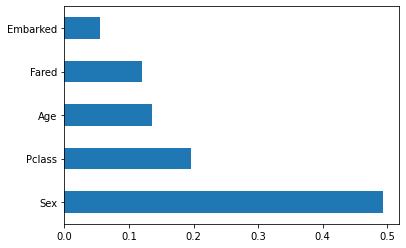

In [36]:
##Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=100)
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
##Dropping features for test dataset.
drp_feat = ['PassengerId','SibSp','Parch']
x_test = data_test.drop(drp_feat,axis=1)

In [39]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(x_train,y_train)
man = model_2.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(,man))
acc_model_2 = round(model_2.score(x_train,y_train)*100,2)
acc_model_2


85.52

In [40]:
##Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

78.23

In [41]:
##k-fold validation for random forest
from sklearn.model_selection import cross_val_score
model_eval_1 = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(model_eval_1, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.84269663 0.71910112 0.80898876 0.83146067 0.83146067
 0.85393258 0.79775281 0.84269663 0.82022472]
Mean: 0.8126092384519351
Standard Deviation: 0.03804955900545703


In [42]:
##k-fold validation for Logistic Regression
from sklearn.model_selection import cross_val_score
model_eval_3 = LogisticRegression(solver='liblinear')
scores = cross_val_score(model_eval_3, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.7752809  0.76404494 0.82022472 0.78651685 0.7752809
 0.75280899 0.78651685 0.82022472 0.76404494]
Mean: 0.784494382022472
Standard Deviation: 0.021936313921234667


In [0]:
submit = pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':man})

In [0]:
submit.to_csv("Output.csv",index=False)